# What this notebook covers

In this notebook we cover:
- An overview of CFMs (what they are, possible trades, definition of price, examples...)
- We find the non-arbitrage fee so that the market is efficient for the Liquid Provider (LP). We assume the presence of another reference market and an arbitrageur so that the price of the CFM always follows the price of the reference market. Using classical arguments of financial maths and stochastic analysis we can find the non-arbitrage fee so that the market is efficient for the LP.
- We see how the above argument is broken under the precise assumption that the CFM charges a fee after every trade. 
- We turn to simulations to study the relation between a Uniswap-type fee and the non-arbitrage fee. 


# An overview of CFMs

A constant function market (CFM) is characterised by

i) The reserves $(x^1,x^2)\in \mathbb R^2_+$ describing amounts of assets in the pool. 

ii) A trading function  $\Psi:\mathbb R_+^2 \rightarrow \mathbb R$ which determines the state of the pool after each trade according to the acceptable fund positions:
\begin{equation}
\left\{ (x^1,x^2) \in \mathbb R^2_+\, :\, \Psi(x^1,x^2) = \text{constant}\right\}.
\end{equation}

iii) A trading fee $(1-\gamma)$, for $\gamma \in (0,1]$.


For the purposes of this paper, we assume  $\Psi:\mathbb R_+^2 \rightarrow \mathbb R$ to be twice continuously differentiable and convex (see \cite{capponi2021adoption}, \cite{angeris2019analysis}). 

To acquire $\Delta x^1_t$ of asset $x^1$ at time $t$ a trader needs to deposit a quantity $\Delta x^2 = \Delta x^2(\Delta x^1)$ of asset $x^2$ into the pool, and pay a fee  $(1-\gamma) \Delta x^2$.\footnote{The fee in Uniswap-V3 is not added to the pool reserves \cite{adams2021uniswap}. This is in contrast to Uniswap-V2.}  $\Delta x^2$ and $\Delta x$ needs to satisfy the equation 
\begin{equation} 
	 \Psi(x^1_t - \Delta x^1, x^2_t + \Delta x^2) =
\Psi(x^1_t , x^2_t)\,.
\end{equation}
Once the trade is accepted the reserves are updated according to 
\begin{equation}
x^1_{t+1}= x^1_t - \Delta x^1 \quad \text{and} \quad x^2_{t+1}= x^2_t + \Delta x^2\,.
\end{equation}
The relative price of trading $\Delta x^1$ for  $\Delta x^2$ is defined as
\begin{equation}
    \frac{P_t^{1,CFM}(\Delta x^1)}{P_t^{2,CFM}(\Delta x^2)}:= \frac{\Delta x^2  }{ \Delta x^1}\, \quad \text{subject to }\quad  \Psi(x^1_t - \Delta x^1, x^2_t + \Delta x^2) =
\Psi(x^1_t , x^2_t)\,.
\end{equation}
Observe that 
\begin{equation}
\begin{split}
 0 =&  \Psi(x^1_t - \Delta x^1, x^2_t + \Delta x^2) - 
\Psi(x^1_t , x^2_t) \\
& \qquad =  - \partial_{x^1}\Psi(x^1_t,x^2_t) \Delta x^1 + \partial_{x^2}\Psi(x^1_t,x^2_t)\Delta x^2 + \mathcal O((\Delta x)^2)\,.
\end{split}
\end{equation}
Hence the relative price of trading an infinitesimal amount of $\Delta x^1$ for $\Delta x^2$ is given by 
\begin{equation}
 \frac{P_t^{1,CFM}}{P_t^{2,CFM}}:= \lim_{\Delta x^1\rightarrow 0} \frac{P_t^{1,CFM}(\Delta x^1)}{P_t^{2,CFM}(\Delta x^2)} 
 =  \frac{\partial_{x^1}\Psi(x^1_t,x^2_t)}{\partial_{x^2} \Psi(x^1_t,x^2_t)}  \,.
\end{equation}

Assume that there is an external market where assets $x^1$ and $x^2$ can be traded (without frictions) at the prices $S_t=(S_t^1,S_t^2)$. The no-arbitrage condition in the case of no fees ($\gamma=1)$ implies that
\begin{equation} 
  \frac{P_t^{1,CFM}}{P_t^{2,CFM}} = \frac{S_t^{1}}{S_t^{2}}
\end{equation}

## Example
Consider the trading function 
\begin{equation}
   \Psi(x^1,x^2)=(x^1)^{\theta}(x^2)^{1-\theta}
\end{equation}
for $\theta\in(0,1)$. The no arbitrage relationship  \eqref{eq no arbitrage price}, in GMM is given by
\begin{equation} 
  \frac{P_t^{1,CFM}}{P_t^{2,CFM}} =  \frac{S_t^{1}}{S_t^{2}}\,.
\end{equation}
The value of the liquidity pool at any time $t\in[0,\infty)$, is given by
\begin{equation}
\psi(S_t;x_t):= x^1_t \cdot S_t^1 + x^2_t \cdot S_t^2\,,   
\end{equation} 
and using no-arbitrage assumption we can show that 

\begin{equation}
   \psi(S_t;x_t) = \frac{1}{\theta} S_t^1 x^1_t\, \quad \text{or} \quad \psi(S_t)= \frac{1}{1-\theta} S_t^2 x^2_t\,, 
\end{equation}
hence under no-arbitrage assumption we can write the value function only in terms of the price $(S_t^1, S_t^2)$,

\begin{equation}
\begin{split}
  \psi(S_t) = & \psi(S_t;x_t)^\theta \cdot \psi(S_t;x_t)^{1-\theta} =  \left(\frac{1}{\theta} S_t^1 x^1_t\right)^\theta \cdot \left( \frac{1}{1-\theta} S_t^2 x^2_t\right)^{1-\theta} \\
               = & (x^1_t)^\theta (x^2_t)^{1-\theta} \cdot \left(\frac{S_t^1}{\theta} \right)^\theta \left( \frac{S_t^2}{1-\theta}  \right)^{1-\theta} \\
               = & \psi(S_0) \cdot \left(\frac{S_t^1}{S_0^1}\right)^\theta \cdot \left(\frac{S_t^2}{S_0^2}\right)^{1-\theta}.
\end{split}
\end{equation}


## Derivation of arbitrage-free fee rate

We make the following assumptions about the market:

- The agent can borrow and lend any amount of cash at the riskless rate.
- The agent can buy and sell any amount of assets $x^1$ and $x^2$. 
- The above transactions do not incur any transaction costs and the size of a trade does not impact the prices of the traded assets. 


We denote the risk free rate (which may be stochastic) by $(r_t)_{t\geq 0}$
and model the money market as

\begin{equation}
    dB_t = r_t B_t dt\,, \qquad B_0\geq 0\,. 
\end{equation}

We assume $r_t\ge 0$. We further denote the drift and diffusion coefficients (again, possibly stochastic) of the risky asset shadow prices by $\mu=(\mu_t^1,\mu_t^2) \in \mathbb R^2$ and 

\begin{equation}
\sigma=(\sigma_t^{(1,1)}, \sigma_t^{(1,2)},\sigma_t^{(2,1)},\sigma_t^{(2,2)}) \in \mathbb R^4_+
\end{equation} 

respectively, and model the shadow price of the risky asset $(S^i_t)_{t\geq 0}$ by

\begin{equation}
    dS_t^{i}= \mu^i_t S_t^i dt + \sum_{j=1}^d \sigma^{(i,j)}_t S_t^i dW_t, \quad S_o^i\geq 0\,,
\end{equation}

where $W=(W_t^1,W_t^2)$ is a $2$-dimensional Brownian motion. We assume that $(\mu,\sigma)$ are sufficiently regular that a (unique strong) solution to \eqref{eq risky asset} exists.

We will proceed to derive an arbitrage-free fee bound in a similar way to the construction of the predictable loss in~\cite{milionis2022automated}, and to classical arguments for no-arbitrage pricing in financial markets.

**Assumption**: The value of the pool as a function of external price process, $s \mapsto \psi(s)$ is twice continuously differentiable.

This assumption holds in the case when the fee $(1-\gamma)=0$ and arbitrageurs  continuously close the gap between $S_t$ and the price of the CFM.

Consider the wealth process $Z$ of an agent who

- begins with zero capital\footnote{This is simply to avoid having to account for the interest they should earn on their initial capital.},
- initially borrows a quantity $\psi(S_0)$ at the risk-free interest rate, which they use to establish a CFM position (which they can do by trading in the liquid market to obtain the desired risky assets for the pool),
- until time $t$, trades in the liquid market hold a quantity $(\Delta_s^i)$ of each asset at time $s$.

The dynamics of $Z_t$ are given by 

\begin{equation}
Z_t = \underbrace{\psi(S_t)-\psi(S_0)}_{\text{CFM gains}}+\underbrace{\int_0^t\sum_{i=1}^2 \Delta^i_s dS^i_s}_{\text{trading gains}} + \underbrace{\int_0^t\Big(Z_s - \sum_{i=1}^2 \Delta^i_s S^i_s\Big)r_s ds}_{\text{interest payments on uninvested wealth}} + \underbrace{\int_0^t f_s ds}_{\text{CFM fees}}.
\end{equation}

We assumed $\psi$ is smooth, hence we can apply It\^o's lemma to obtain

\begin{equation}
\begin{split}
  Z_t &= \sum_{i=1}^2 \int_0^t\Big[\partial_i \psi(S_s) + \Delta^i_s\Big]dS_s^i
 + \frac{1}{2}\sum_{i,j=1}^2 \int_0^t \partial_i \partial_j \psi(S_s)d\langle S^i,S^j\rangle_s + \int_0^t\Big[\Big(Z_s - \sum_{i=1}^2 \Delta^i_s S^i_s\Big)r_s+f_s\Big] ds.
\end{split}
\end{equation}

By setting $\Delta_s^i = -\partial_i \psi(S_s)$, we eliminate the first term, giving

\begin{equation}
\begin{split}
  Z_t &= \frac{1}{2}\sum_{i,j=1}^2 \int_0^t \partial_i \partial_j \psi(S_s)d\langle S^i,S^j\rangle_s + \int_0^t\Big[\Big(Z_s + \sum_{i=1}^2 (\partial_i \psi(S_s) ) S^i_s\Big)r_s+f_s\Big] ds.
\end{split}
\end{equation}
As the quadratic variation is  $d\langle S^i,S^j\rangle_s = (\sigma_s\sigma_s^\top)^{(i,j)} S_s^iS_s^jds $, this simplifies to
\begin{equation}
  \frac{dZ_s}{ds} = \frac{1}{2}\sum_{i,j=1}^2 \partial_i \partial_j \psi(S_s)(\sigma_s\sigma_s^\top)^{(i,j)} S_s^iS_s^j + \Big(Z_s + \sum_{i=1}^2 (\partial_i \psi(S_s) ) S^i_s\Big)r_s+f_s.
\end{equation}
If this quantity is positive, then we have a strategy which earns money with probability one over a short time period, that is, an arbitrage. Therefore, after rearrangement, we know that 
\begin{equation}
  f_s  + Z_sr_s\le -\frac{1}{2}\sum_{i,j=1}^2 \partial_i \partial_j \psi(S_s)(\sigma_s\sigma_s^\top)^{(i,j)} S_s^iS_s^j - \Big(\sum_{i=1}^2 (\partial_i \psi(S_s) ) S^i_s\Big)r_s.
\end{equation}
As $Z$ is increasing in $f$ (an agent who earns more fees will be wealthier) and we assume $r\ge 0$, there is a unique value of $f$ such that above equation is an equality. 
With this CFM trading fee income per unit of time, we have $dZ_s/ds = 0$ and $Z_0=0$,  and hence $Z_s = 0$. 
We denote this critical value\footnote{\cite{faycal} give a similar calculation, to obtain a closely related quantity, which they call the permanent loss of the CFM.}
\begin{equation}
\hat f_s = -\frac{1}{2}\sum_{i,j=1}^2 \partial_i \partial_j \psi(S_s)(\sigma_s\sigma_s^\top)^{(i,j)} S_s^iS_s^j - \Big(\sum_{i=1}^2 (\partial_i \psi(S_s) ) S^i_s\Big)r_s.
\end{equation}



# Simulation

We design an Agent-Based-Model with the aim to compare the accumulated fees by a CFM defined as in the above Example with $\theta=1/2$ in a period of time $[0,T]$ against the accumulated non-arbitrage fee derived in Section \ref{section arbitrage free model}. 


We consider the CFM with $x^1$ being the numeraire. Price discovery occurs in a second reference market, where $S_t$ denotes the price of asset $x^2$ in terms of the numeraire $x^1$ at time $t$.  We model the price $S_t$ by a Geometric Brownian Motion

\begin{equation}
dS_t = \sigma S_t dW_t, \quad S_0>0.
\end{equation}

Whenever the price of asset $x^2$ in terms of the numeraire $x^1$ in the CFM is different than $S_t$, there might be an arbitrage opportunity. An arbitrageur will automatically make the necessary trades to maximise their profit. Furthermore we model the arrival of liquidity takers by Poisson process $(N_t)_t$ with intensity $\lambda$. We run the simulation of discrete times $\Pi := \{0,t_1,t_2,...,T\}$ and initialise the simulation with reserves $(x^1_0,x^2_0)$ and fee $(1-\gamma)$; initial  price $S_0$ and volatility $\sigma$; liquidity takers arrival intensity $\lambda$. We run the following simulation. 

    
For every $t\in\Pi$:

- The arbitrageur makes the necessary trades resulting from optimisations in the CFM and in the reference market to make a risk-free profit.
- If $N_t - N_{t-} = 1$ then a price-sensitive liquidity trader arrives and trades $\Delta_t\in\mathbb R$ sampled from $\mathcal N(0,1)$ of asset $x^1$. The noise trader chooses the market with better execution price with some high probability $p$, i.e. we allow for the noise trader to be irrational with probability $(1-p)$ (Perfectly rational liquidity trader would consider splitting the order to optimise the execution cost. We omit this extension in our simulations.).
    


In [1]:
import numpy as np
from itertools import product
from collections import defaultdict
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import argparse
import os
import sys

home_dir = os.path.split(os.getcwd())[0]
if home_dir not in sys.path:
    sys.path.append(home_dir)

from cfm_sim.trader import Trader, Arbitrageur
from cfm_sim.cpm import CPM
from cfm_sim.cex import CEX
from cfm_sim.exchange import Pool
from cfm_sim.poisson_process import sample_exponential

In [2]:
np.random.seed(1010)
poisson = True # to be changed to False to remove Noise traders
if poisson:
    results_dir = os.path.join('plots','arb_and_noise')
else:
    results_dir = os.path.join('plots', 'arb')
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

Simulation function

In [7]:
def run_sim(init_price: float, N_mc: int, gammas, sigmas, plots_dir, ts: np.ndarray, poisson: bool):

    lam =75 
    # SIMULATE N_MC scenarios for each gamma, sigma
    for gamma, sigma in product(gammas, sigmas):
        print('gamma = {}, sigma={}'.format(gamma, sigma))
        for n_mc in tqdm(range(N_mc)):
            np.random.seed(10101)
            # init CFM pool
            cpm_illiquid = CPM(x=10., y=10. * init_price, gamma=gamma) # not so liquid
            # init cex
            cex = CEX( sigma=sigma, init_price=init_price) # very liquid
            # init trader wallet and arb wallet
            arb = Arbitrageur(x=0., y=0.)
            trader_price_sensitive = Trader(x=0., y=0.)
            #Poisson
            lag_arrival_process = sample_exponential(lam=lam)
            last_arrival_time = 0

            fees_x = []
            fees_y = []
            fees_premium = []
            last_fees = Pool(0,0)
            S_aux = np.ones(ts.shape)*10
            h = ts[1] - ts[0]
            S_aux[1:] = np.exp(-0.5 * sigma**2 * h + sigma * np.sqrt(h)*np.random.randn(100))
            S_aux = S_aux.cumprod()
            for i, t in enumerate(ts[:-1]):
                last_premium = cpm_illiquid.streaming_premia

                h = ts[i+1] - ts[i]
                # we update the streaming premia of illiquid CFM
                S, _,_ = cex.price_descr
                cpm_illiquid.update_streaming_premia(sigma=sigma, h=h, S=S)
                # exogeneous price movement in CEX
                #cex.update_S(h=h,)
                cex.S_past.append(S_aux[i+1])
                # Arbitrageur makes profit (if possible)
                arb.execute_arbitrage(to_liquid = cex, to_illiquid = cpm_illiquid)
                
                # poisson process for price sensitive trade
                if poisson:
                    if t > (last_arrival_time + lag_arrival_process):
                        trader_price_sensitive.send_trade_price_sensitive(to_illiquid=cpm_illiquid, to_liquid=cex)
                        lag_arrival_process = sample_exponential(lam=lam)
                        last_arrival_time = t
                
                cpm_illiquid.update_past()
                fees_x.append((cpm_illiquid.fees.x - last_fees.x) / h)
                fees_y.append((cpm_illiquid.fees.y - last_fees.y) / h)
                fees_premium.append((cpm_illiquid.streaming_premia - last_premium)/h)
                last_fees.x = cpm_illiquid.fees.x
                last_fees.y = cpm_illiquid.fees.y

        # Plot episode
        cpm_S = cpm_illiquid.S_past
        cex_S = cex.S_past

        fees_y = np.array(fees_y) + np.array(fees_x) * cex_S[-1]
        fees_premium = np.array(fees_premium)

        fig, ax = plt.subplots(figsize=(12,4))
        ax.plot(ts, cpm_S, label=r"cpm $S_t$")
        ax.plot(ts, cex_S, label=r"cex $S_t$")
        ax.set_xlabel("time")
        ax.set_title(r"$\sigma=0.4, \gamma = %.3f$" % gamma)
        ax.grid(True)
        ax.legend()
        fig.savefig(os.path.join(plots_dir, "S_sigma{}_gamma{}.pdf".format(sigma, gamma)))
        
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)
        ax0.plot(ts[:-1], fees_y, color='steelblue')
        ax0.fill_between(ts[:-1], 0, fees_y, color='steelblue', alpha=0.5)
        ax0.set_xlabel('time')
        ax0.set_title(r"Uniswap fee, $\sigma=0.4, \gamma = %.3f$" % gamma)
        ax0.grid(True)
        textstr = 'Accumulated fees: {:.3f}'.format(fees_y.sum() * h)
        props = dict(boxstyle='round', facecolor='steelblue', alpha=0.2)
        ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=10, verticalalignment='top', bbox=props)

        ax1.plot(ts[:-1], fees_premium, color='seagreen')
        ax1.fill_between(ts[:-1], 0, fees_premium, color='seagreen', alpha=0.5)
        ax1.set_xlabel('time')
        ax1.set_title(r"Non-arb fee, $\sigma=0.4, \gamma = %.3f$" % gamma)
        ax1.grid(True)
        textstr = 'Accumulated fees: {:.3f}'.format(fees_premium.sum() * h)
        props = dict(boxstyle='round', facecolor='seagreen', alpha=0.2)
        ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=props)
        fig.savefig(os.path.join(plots_dir, "fees_sigma{}_gamma{}.pdf".format(sigma, gamma)))

        tqdm.write('sigma={}, gamma={:.3f}'.format(sigma, gamma))

    return 0

### Low fee scenario

We set 0.3% fee, i.e. $\gamma = 0.997$, and volatility 0.4, i.e. $\sigma=0.4$

gamma = 0.997, sigma=0.4


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


sigma=0.4, gamma=0.997


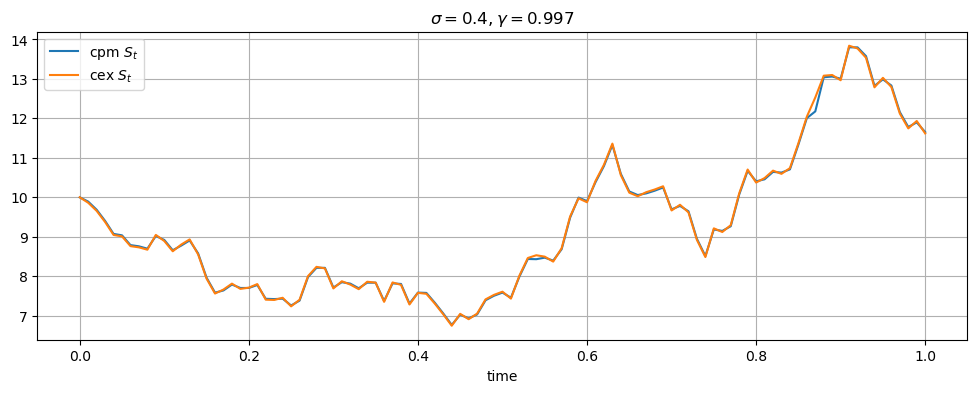

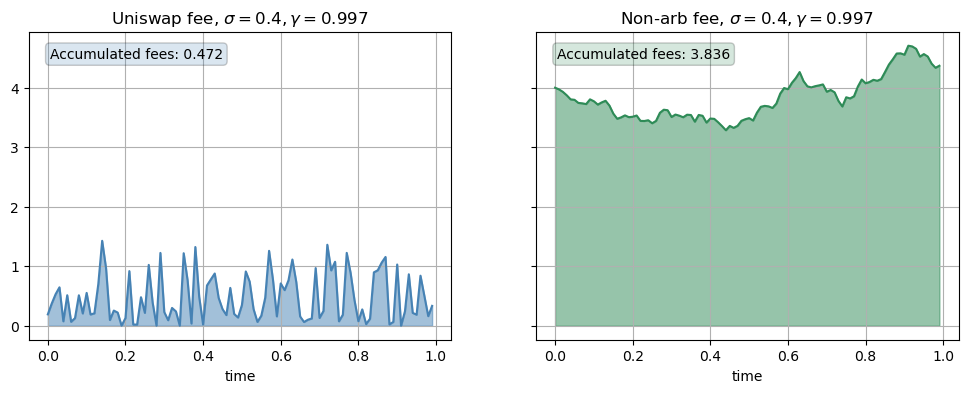

In [9]:
init_price = 10
gammas = [0.997]
sigmas = [0.4]
N_mc = 1
ts = np.linspace(0,1,101)

_ = run_sim(init_price=init_price, 
                            N_mc = N_mc, 
                            gammas=gammas, 
                            sigmas=sigmas, 
                            plots_dir = results_dir, 
                            ts=ts,
                            poisson=poisson)

### High fee scenario

We set 4% fee, i.e. $\gamma = 0.96$, and volatility 0.4, i.e. $\sigma=0.4$

gamma = 0.96, sigma=0.4


100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


sigma=0.4, gamma=0.960


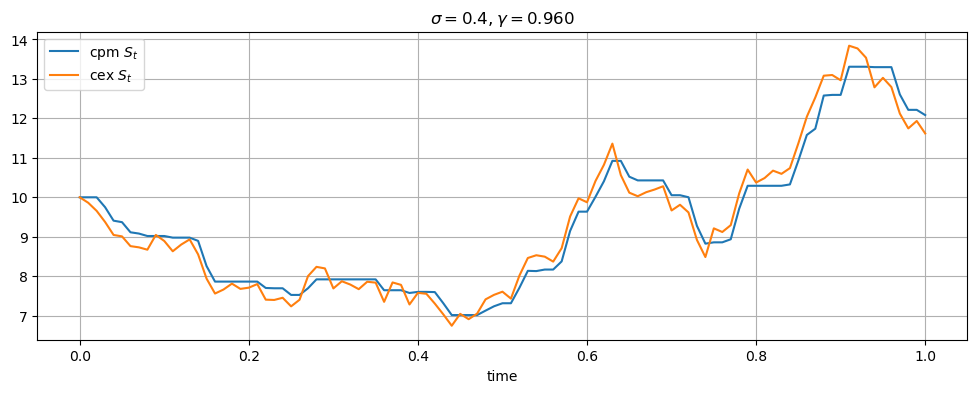

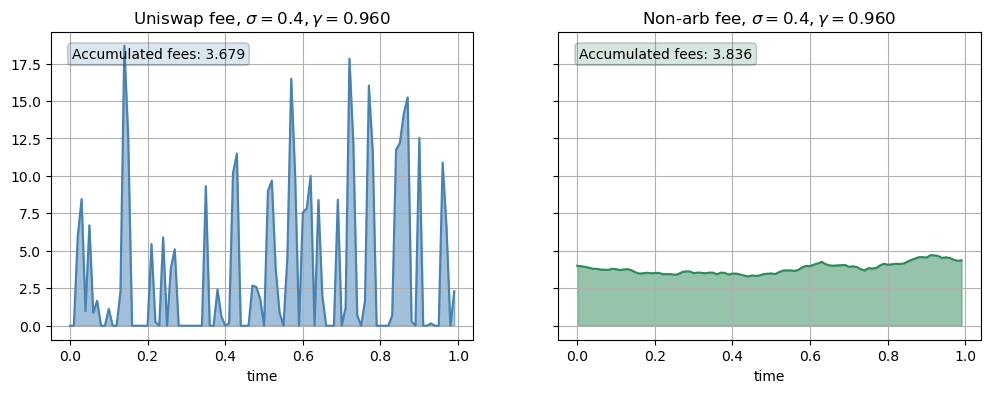

In [10]:
init_price = 10
gammas = [0.96]
sigmas = [0.4]
N_mc = 1
ts = np.linspace(0,1,101)

_ = run_sim(init_price=init_price, 
                            N_mc = N_mc, 
                            gammas=gammas, 
                            sigmas=sigmas, 
                            plots_dir = results_dir, 
                            ts=ts,
                            poisson=poisson)

## Plots discussion

For these two scenarios, we plot the CFM and the non-arbitrage fee rate. The area unders the fee rates correpsonds to accumlated fees in that particular simulation. High values of fees (low values of $\gamma$) indicate less arbitrage opportunities, and therefore the number of trades will be lower than in the low fees scenarios. Hence increasing the fee rate does not necessarily lead to higher fee income. However, in higher fees regimes, the trade sizes will necessarily be higher (there will only be an arbitrage opportunity when the gap between the CFM price and the reference price is big enough to compensate for the fee). 

The smaller the fee (the higher the value of $\gamma$) the closer the CFM price process depicted in blue follows the reference market price $S_t$. 